## PRE-PROCESSING

In [1]:
!pip install pandas
!pip install scikit-learn

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# leggi i file e salva l'input in due DataFrames
training_data = pd.read_csv('train.csv', error_bad_lines=False, dtype=str)
test_data = pd.read_csv('test.csv', error_bad_lines=False, dtype=str)

In [59]:
# verifica presenza valori nulli nelle colonne
training_data.isnull().any()

Churn               False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [12]:
# encoding delle categorical variables da string a int
encoder = LabelEncoder()
training_encoded = training_data.apply(encoder.fit_transform)
test_encoded = test_data.apply(encoder.fit_transform)

In [14]:
# stampiamo la tabella delle correlazioni tra le varie features
# correlazione maggiore (in valore assoluto) = feature più influente per l'analisi
print(training_encoded.corr())

                     Churn  customerID    gender  SeniorCitizen   Partner  \
Churn             1.000000   -0.017698 -0.018921       0.133957 -0.132326   
customerID       -0.017698    1.000000  0.018772      -0.013145 -0.031767   
gender           -0.018921    0.018772  1.000000      -0.012747 -0.008712   
SeniorCitizen     0.133957   -0.013145 -0.012747       1.000000  0.021314   
Partner          -0.132326   -0.031767 -0.008712       0.021314  1.000000   
Dependents       -0.155147   -0.016765  0.013579      -0.211710  0.444052   
tenure           -0.253136    0.001607 -0.001817       0.003318  0.277416   
PhoneService      0.013026   -0.026850 -0.015802      -0.007382  0.033226   
MultipleLines     0.029782   -0.009823 -0.002785       0.129437  0.151456   
InternetService  -0.043818   -0.022547 -0.004192      -0.038699  0.000782   
OnlineSecurity   -0.278468    0.015896 -0.028950      -0.119062  0.165796   
OnlineBackup     -0.194179   -0.008561 -0.018096      -0.011127  0.170769   

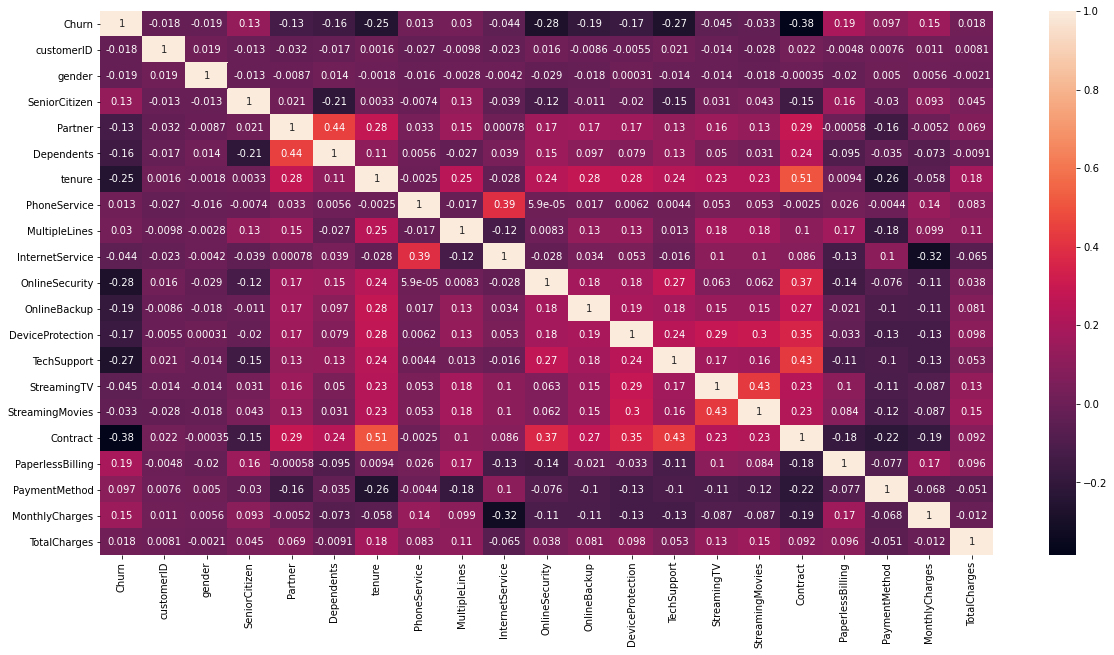

In [64]:
# visualizzazione più efficace
plt.figure(figsize=(20,10))
mappa = sns.heatmap(training_encoded.corr(), annot=True)

In [ ]:
# METTICI IL GRAFICO DEI MESI

In [ ]:
# dall'analisi precedente si evince che alcune features possono essere eliminate in quanto poco utili alla previsione:
training_encoded = training_encoded.drop(["TotalCharges","PhoneService","customerID","gender"], axis=1)
test_encoded = test_encoded.drop(["TotalCharges","PhoneService","customerID","gender"], axis=1)

In [ ]:
# selezioniamo la variabile su cui effettuare la predizione
y_train = training_encoded['Churn']

# dichiariamo la variabile con le features
X_train = training_encoded.drop(['Churn'], axis=1)

# facciamo la stessa cosa col test set
y_test = test_encoded['Churn']
X_test = test_encoded.drop(['Churn'], axis=1)

## DECISION TREE

In [51]:
# rappresentazione grafica dell'importanza delle feature
def plot_feature_importances_telco(model):
    n_features = X_train.columns.shape[0]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [52]:
# modellazione tramite decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
train_accuracy = tree.score(X_train, y_train)
accuracy = tree.score(X_test, y_test)
print("MODEL ACCURACY ON TRAINING SET: ", train_accuracy)
print("MODEL ACCURACY ON TEST SET: ", accuracy)

MODEL ACCURACY ON TRAINING SET:  0.9975593521189261
MODEL ACCURACY ON TEST SET:  0.6628216503992902


In [53]:
# analisi dell'importanza delle features
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.02824076 0.02725186 0.03175391 0.20131992 0.02155694 0.02546402
 0.04607878 0.01866864 0.01771214 0.02388415 0.01061647 0.015175
 0.15624395 0.02617364 0.0368428  0.31301701]


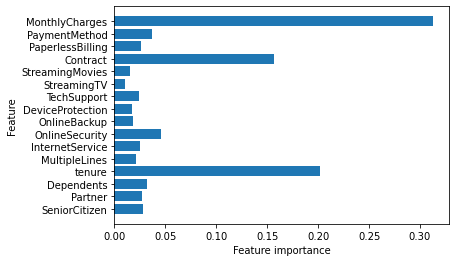

In [54]:
plot_feature_importances_telco(tree)

In [55]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
train_accuracy = tree.score(X_train, y_train)
accuracy = tree.score(X_test, y_test)
print("MODEL ACCURACY ON TRAINING SET: ", train_accuracy)
print("MODEL ACCURACY ON TEST SET: ", accuracy)

MODEL ACCURACY ON TRAINING SET:  0.7785666740625693
MODEL ACCURACY ON TEST SET:  0.7755102040816326


In [56]:
# analisi dell'importanza delle features
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.13091779 0.         0.08023657
 0.14609995 0.         0.         0.         0.         0.01059307
 0.57060454 0.         0.         0.06154807]


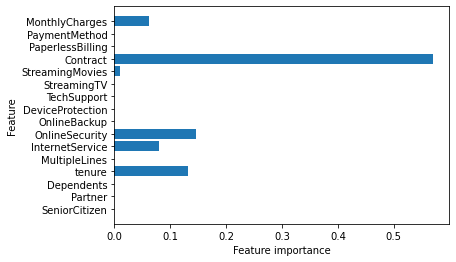

In [57]:
plot_feature_importances_telco(tree)

In [ ]:
# ho deciso di mantenere anche l'analisi tramite decision trees perchè la
# reputo interessante dal punto di vista delle features, ma in ogni caso
# la scelta del classificatore ricade sulla Logistic Regression

## LOGISTIC REGRESSION

In [26]:
# utilizziamo un modello di logistic regression, poiché si è rivelato il più accurato dopo aver testato
# sia decision trees che k-nn
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("MODEL ACCURACY ON TRAINING SET: ", logreg.score(X_train, y_train))
print("MODEL ACCURACY ON TEST SET: ", logreg.score(X_test, y_test))

MODEL ACCURACY ON TRAINING SET:  0.7785666740625693
MODEL ACCURACY ON TEST SET:  0.7950310559006211
